<a href="https://colab.research.google.com/github/pradakshina12/BDA_project/blob/main/BDA_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df=pd.read_csv("/content/loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0],
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0],
       ...,
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0],
       ['Female', 'No', '0', 'Graduate', 360.0, 0.0]], dtype=object)

In [9]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [10]:
print("per of missing loan is %2f%%" %((df['Loan_Status'].isnull().sum()/df.shape[0])*100))

per of missing loan is 0.000000%


Loan_Status
Y    422
N    192
Name: count, dtype: int64


/tmp/ipython-input-11-4166484926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status',data=df,palette='Set2')


<Axes: xlabel='Loan_Status', ylabel='count'>

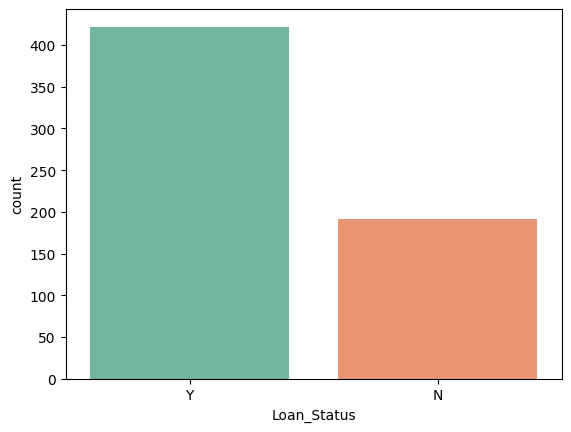

In [11]:

print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=df,palette='Set2')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state= 0)
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder ()

In [15]:
for i in range(0, 5):
 X_train[:,i]=Labelencoder_x.fit_transform (X_train[:,i])
 X_train[:,7]= Labelencoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, 0, 360.0, 1.0],
       [1, 0, 1, 0, 360.0, nan],
       [1, 1, 0, 0, 360.0, 0.0],
       ...,
       [1, 1, 3, 0, 360.0, 1.0],
       [1, 1, 0, 1, 360.0, 1.0],
       [0, 1, 0, 0, 360.0, 1.0]], dtype=object)

In [16]:
Labelencoder_y = LabelEncoder ()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [18]:
for i in range(0,4):
 X_test[:,i]= Labelencoder_x.fit_transform (X_test[:,i])
 X_test[:,5]= Labelencoder_x.fit_transform (X_test[:,5])
X_test

array([[1, 0, 0, 0, 360.0, 1],
       [0, 0, 0, 0, 360.0, 1],
       [1, 1, 0, 0, 360.0, 1],
       [1, 1, 0, 0, 360.0, 1],
       [1, 1, 2, 0, 360.0, 1],
       [1, 1, 0, 1, 180.0, 0],
       [1, 1, 3, 0, 180.0, 1],
       [1, 0, 0, 0, 360.0, 1],
       [1, 0, 0, 0, nan, 0],
       [1, 1, 0, 0, 360.0, 1],
       [0, 0, 0, 0, 360.0, 1],
       [1, 1, 1, 0, 360.0, 1],
       [0, 0, 0, 0, 360.0, 1],
       [1, 1, 2, 0, 360.0, 1],
       [1, 1, 0, 0, 360.0, 1],
       [1, 1, 1, 0, 360.0, 1],
       [1, 0, 1, 1, 360.0, 2],
       [1, 0, 0, 1, 360.0, 1],
       [0, 0, 0, 0, 360.0, 2],
       [1, 1, 0, 1, 360.0, 0],
       [0, 1, 0, 0, 360.0, 0],
       [1, 1, 0, 0, 360.0, 1],
       [1, 1, 2, 0, 360.0, 1],
       [1, 1, 2, 0, 360.0, 1],
       [1, 1, 0, 0, 360.0, 2],
       [1, 1, 1, 0, 360.0, 1],
       [1, 0, 0, 0, 360.0, 1],
       [1, 1, 0, 0, 360.0, 1],
       [1, 1, 3, 0, 360.0, 0],
       [0, 0, 0, 0, 360.0, 0],
       [1, 1, 0, 0, 360.0, 1],
       [1, 0, 0, 1, 360.0, 1],
       [1,

In [19]:
Labelencoder_y = LabelEncoder ()
y_test= Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
X_train= ss.fit_transform (X_train)
x_test= ss.fit_transform(X_test)

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
X_train= ss.fit_transform (X_train)
x_test= ss.fit_transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Instantiate the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42) # You can adjust hyperparameters as needed

# Assuming X_train and y_train are your training data
rf_clf.fit(X_train, y_train)  # Train the classifier

y_pred = rf_clf.predict(x_test)
print("acc of random forest clf is", metrics.accuracy_score(y_pred, y_test))
y_pred

acc of random forest clf is 0.7398373983739838


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_classifier= GaussianNB()
nb_classifier. fit (X_train, y_train)

GaussianNB()

In [28]:
y_pred = nb_classifier.predict (X_test)
print ("acc of gaussian NB is %.", metrics.accuracy_score(y_pred, y_test) )

acc of gaussian NB is %. 0.2764227642276423


In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit (X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred =dt_clf.predict(X_test)
print("acc of DT is", metrics.accuracy_score(y_pred, y_test))

acc of DT is 0.7073170731707317


In [32]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [33]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred=kn_clf.predict(X_test)
print("acc of KN is",metrics.accuracy_score(y_pred,y_test))

acc of KN is 0.7317073170731707


In [36]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier, GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, log
from pyspark.sql.functions import mean, when, isnull
from pyspark.ml.feature import StringIndexer
spark = SparkSession.builder.appName("LoanPrediction").getOrCreate()

df = spark.read.csv("/content/loan_data_set.csv", header=True, inferSchema=True)

df.show()

df.describe().show()

df = df.withColumn("loanAmount_log", log(df['LoanAmount']))
df = df.withColumn("TotalIncome", df['ApplicantIncome'] + df['CoapplicantIncome'])
df = df.withColumn("TotalIncome_log", log(df['TotalIncome']))


means = {col: df.select(mean(col)).first()[0] for col in df.columns if df.schema[col].dataType != "string"}

means = {key: value for key, value in means.items() if value is not None}

df = df.fillna(means)

modes = {
    'Gender': df.groupBy('Gender').count().orderBy('count', ascending=False).first()['Gender'],
    'Married': df.groupBy('Married').count().orderBy('count', ascending=False).first()['Married'],
    'Self_Employed': df.groupBy('Self_Employed').count().orderBy('count', ascending=False).first()['Self_Employed'],
    'Dependents': df.groupBy('Dependents').count().orderBy('count', ascending=False).first()['Dependents']
}
df = df.fillna(modes)

df = df.fillna({'Gender': df.groupby('Gender').count().orderBy('count', ascending=False).first()['Gender'],
                'Married': df.groupby('Married').count().orderBy('count', ascending=False).first()['Married']})

features = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'loanAmount_log', 'TotalIncome_log']
label = 'Loan_Status'

label_indexer = StringIndexer(inputCol=label, outputCol=label + "_index", handleInvalid="keep")
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in features]
assembler = VectorAssembler(inputCols=[col + "_index" for col in features], outputCol="features")


train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

rf = RandomForestClassifier(labelCol=label +"_index" , featuresCol="scaled_features")

pipeline = Pipeline(stages=indexers + [label_indexer,assembler, scaler, rf])



+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

In [37]:
model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol=label + "_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")




Accuracy: 0.6929133858267716


In [38]:
import pickle # import the pickle module

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=1)
model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f) # Now pickle.dump should work correctly

In [39]:
!ls


loan_data_set.csv  model.pkl  sample_data


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

loan_data=pd.read_csv("/content/loan_data_set.csv")
# Handle missing values by filling with mean for numerical columns
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    loan_data[column] = le.fit_transform(loan_data[column])
    label_encoders[column] = le

# Select features and target
X = loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
y = loan_data['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without PCA
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred)

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

# Display results
accuracy_without_pca, accuracy_with_pca


/tmp/ipython-input-41-1994560246.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
/tmp/ipython-input-41-1994560246.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

(0.7886178861788617, 0.6504065040650406)

In [42]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

# Display results
accuracy_without_pca, accuracy_with_pca

(0.7886178861788617, 0.6504065040650406)

In [43]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train,y_train)

PCA()

In [45]:
import pickle

# Extract coefficients and intercept
coefficients = model.coef_.tolist()
intercept = model.intercept_.tolist()

# Save to a dictionary
model_data = {
    "coefficients": coefficients,
    "intercept": intercept
}

# Serialize the dictionary as a pickle file
pickle_path = "log_reg_model.pkl"
with open(pickle_path, "wb") as f:
    pickle.dump(model_data, f)

print(f"Model coefficients and intercept saved as {pickle_path}")

Model coefficients and intercept saved as log_reg_model.pkl


In [56]:
from google.colab import files
files.download('log_reg_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>